<a href="https://colab.research.google.com/github/jittakorn-ch/DWDM21/blob/main/Chapter8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

## Generate Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

## Explore data

In [ ]:
X.shape

(500, 2)

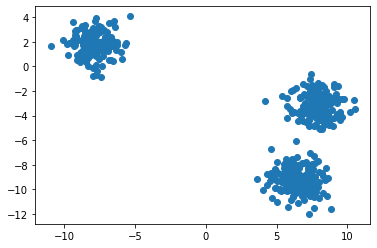

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

# Clustering

## Import

In [ ]:
from sklearn.cluster import KMeans

## Define

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=6)

## Fit-Predict

In [ ]:
#output บอกว่า data แต่ล่ะจุดอยู่กลุ่มไหน
y_clust = kmeans.fit_predict(X)
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

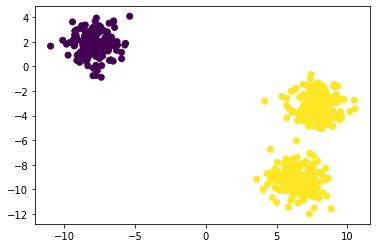

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

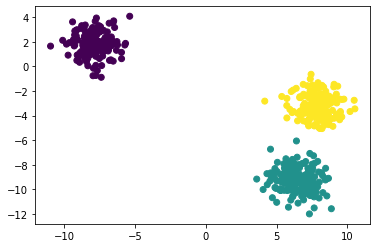

In [ ]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

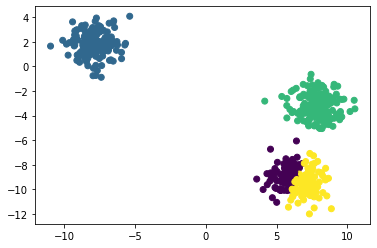

In [ ]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

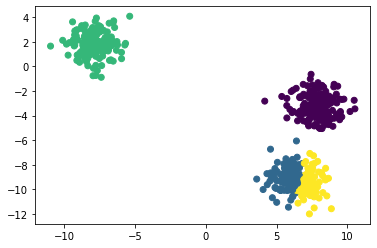

In [ ]:
#define
kmeans = KMeans(n_clusters=4, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

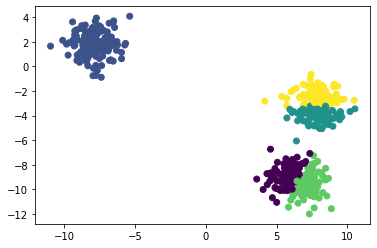

In [ ]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

# Example application (Color Quantization)

In [ ]:
import cv2
import os

In [ ]:
img = cv2.imread('/content/fork.jpg')

In [ ]:
img.shape

(162, 311, 3)

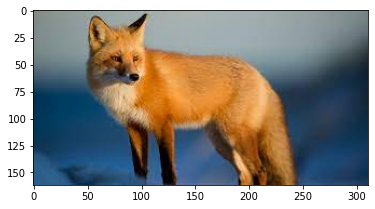

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

## นับจำนวนสี

In [ ]:
import numpy as np

In [ ]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(23256, 3)

## จัดกลุ่มสีให้เหลือ 16 สี

In [ ]:
myquantize = KMeans(n_clusters=16,random_state=6)

## แปลงข้อมูลให้อยู่ในรูป row-column

In [ ]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(50382, 3)

In [ ]:
final_color = myquantize.fit_predict(img_row)

## ใช้ centroid เป็นตัวแทนของสี

In [ ]:
centroid = myquantize.cluster_centers_

In [ ]:
centroid

array([[ 31.46560944,  53.58989489,  75.94468007],
       [186.37263969, 123.4177264 ,  59.36570328],
       [174.96030871, 142.77728776, 108.3076075 ],
       [ 96.89421613, 114.29033486, 125.96042618],
       [ 73.83342037,  81.71749347,  89.12741514],
       [224.51165422, 147.34736366,  67.93686354],
       [132.34421182, 146.73275862, 148.70792282],
       [ 81.00169683,  50.14423077,  24.82352941],
       [141.45794824,  82.03743068,  25.7754159 ],
       [232.46871089, 181.15769712, 122.61702128],
       [ 11.08363548,  59.38747885,  94.15832729],
       [ 27.3907455 ,  11.95029991,   7.9562982 ],
       [ 53.46838407,  94.76551522, 137.40895785],
       [205.35745721, 114.77799511,  20.00733496],
       [ 32.55773196,  72.9385567 , 110.51340206],
       [159.24328496, 171.09169497, 172.6727385 ]])

## การแทนสีคืนลงไป

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

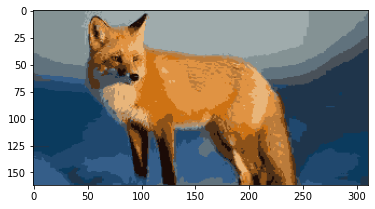

In [ ]:
plt.imshow(new_img/255)

In [ ]:
plt.imsave('img.jpg',new_img/255)

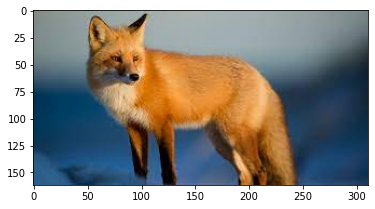

In [ ]:
plt.imshow(RGB_img)